In [52]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/按日期单品合并.csv",encoding='utf-8',index_col='销售日期')
pl = pd.read_excel("../data/附件1.xlsx")
pl['单品编码'] = pl['单品编码'].astype(str)
pl = pl.set_index('单品编码')
print(pl)

                       单品名称        分类编码 分类名称
单品编码                                        
102900005115168        牛首生菜  1011010101  花叶类
102900005115199       四川红香椿  1011010101  花叶类
102900005115625      本地小毛白菜  1011010101  花叶类
102900005115748         白菜苔  1011010101  花叶类
102900005115762          苋菜  1011010101  花叶类
...                     ...         ...  ...
106958851400125   海鲜菇(袋)(4)  1011010801  食用菌
106971533450003      海鲜菇(包)  1011010801  食用菌
106971533455008   海鲜菇(袋)(3)  1011010801  食用菌
106973223300667   虫草花(盒)(2)  1011010801  食用菌
106973990980123  和丰阳光海鲜菇(包)  1011010801  食用菌

[251 rows x 3 columns]


In [53]:
sum_per_column = pd.DataFrame(df.sum()).T
print(sum_per_column)

   102900005117056  102900005115960  102900005115823  102900005115908  \
0         9703.125        19187.218         7606.756         4496.717   

   102900005115779  102900011008522  102900005118824  102900005115984  \
0        15910.461         4685.261         1179.652        10305.364   

   102900005116530  102900005116226  ...  102900011035740  102900011034538  \
0        11920.227         1186.531  ...            371.0              3.0   

   102900011023976  102900011036266  102900011032480  102900011036242  \
0           62.221              3.0            2.224             45.0   

   102900011035849  102900011021675  106972776821582  102900011036686  
0           16.538            2.388            128.0             27.0  

[1 rows x 246 columns]


                    0
大白菜         19187.218
上海青          7606.756
菜心           4496.717
云南生菜        15910.461
甜白菜          4685.261
...               ...
洪山菜薹莲藕拼装礼盒      3.000
白蒿              2.224
大白菜秧           16.538
鲜粽叶(袋)(3)     128.000
木耳菜(份)         27.000

[99 rows x 1 columns]
                0
西兰花     27537.228
青梗散花     8393.786
紫白菜(1)     13.251
紫白菜(2)      0.615
枝江青梗散花   5821.571
                  0
高瓜(1)      1179.652
洪湖藕带        745.554
净藕(1)     27149.440
莲蓬(个)      2095.000
红莲藕带        100.469
菱角          126.422
野藕(1)       448.860
野生粉藕         50.815
荸荠         1671.424
洪湖莲藕(粉藕)   6052.000
鲜藕带(袋)       21.000
藕尖           18.614
荸荠(份)        10.000
高瓜(2)       449.684
洪湖莲藕(脆藕)     40.000
净藕(3)       348.800
野藕(2)        11.398
净藕(2)        62.221
                0
青茄子(1)   3516.763
紫茄子(2)  13602.001
大龙茄子     1167.218
圆茄子(2)   1047.689
花茄子       101.379
长线茄      2496.413
紫圆茄         7.658
青茄子(2)    190.522
紫茄子(1)    297.158
圆茄子(1)      4.981
                      0
泡泡椒

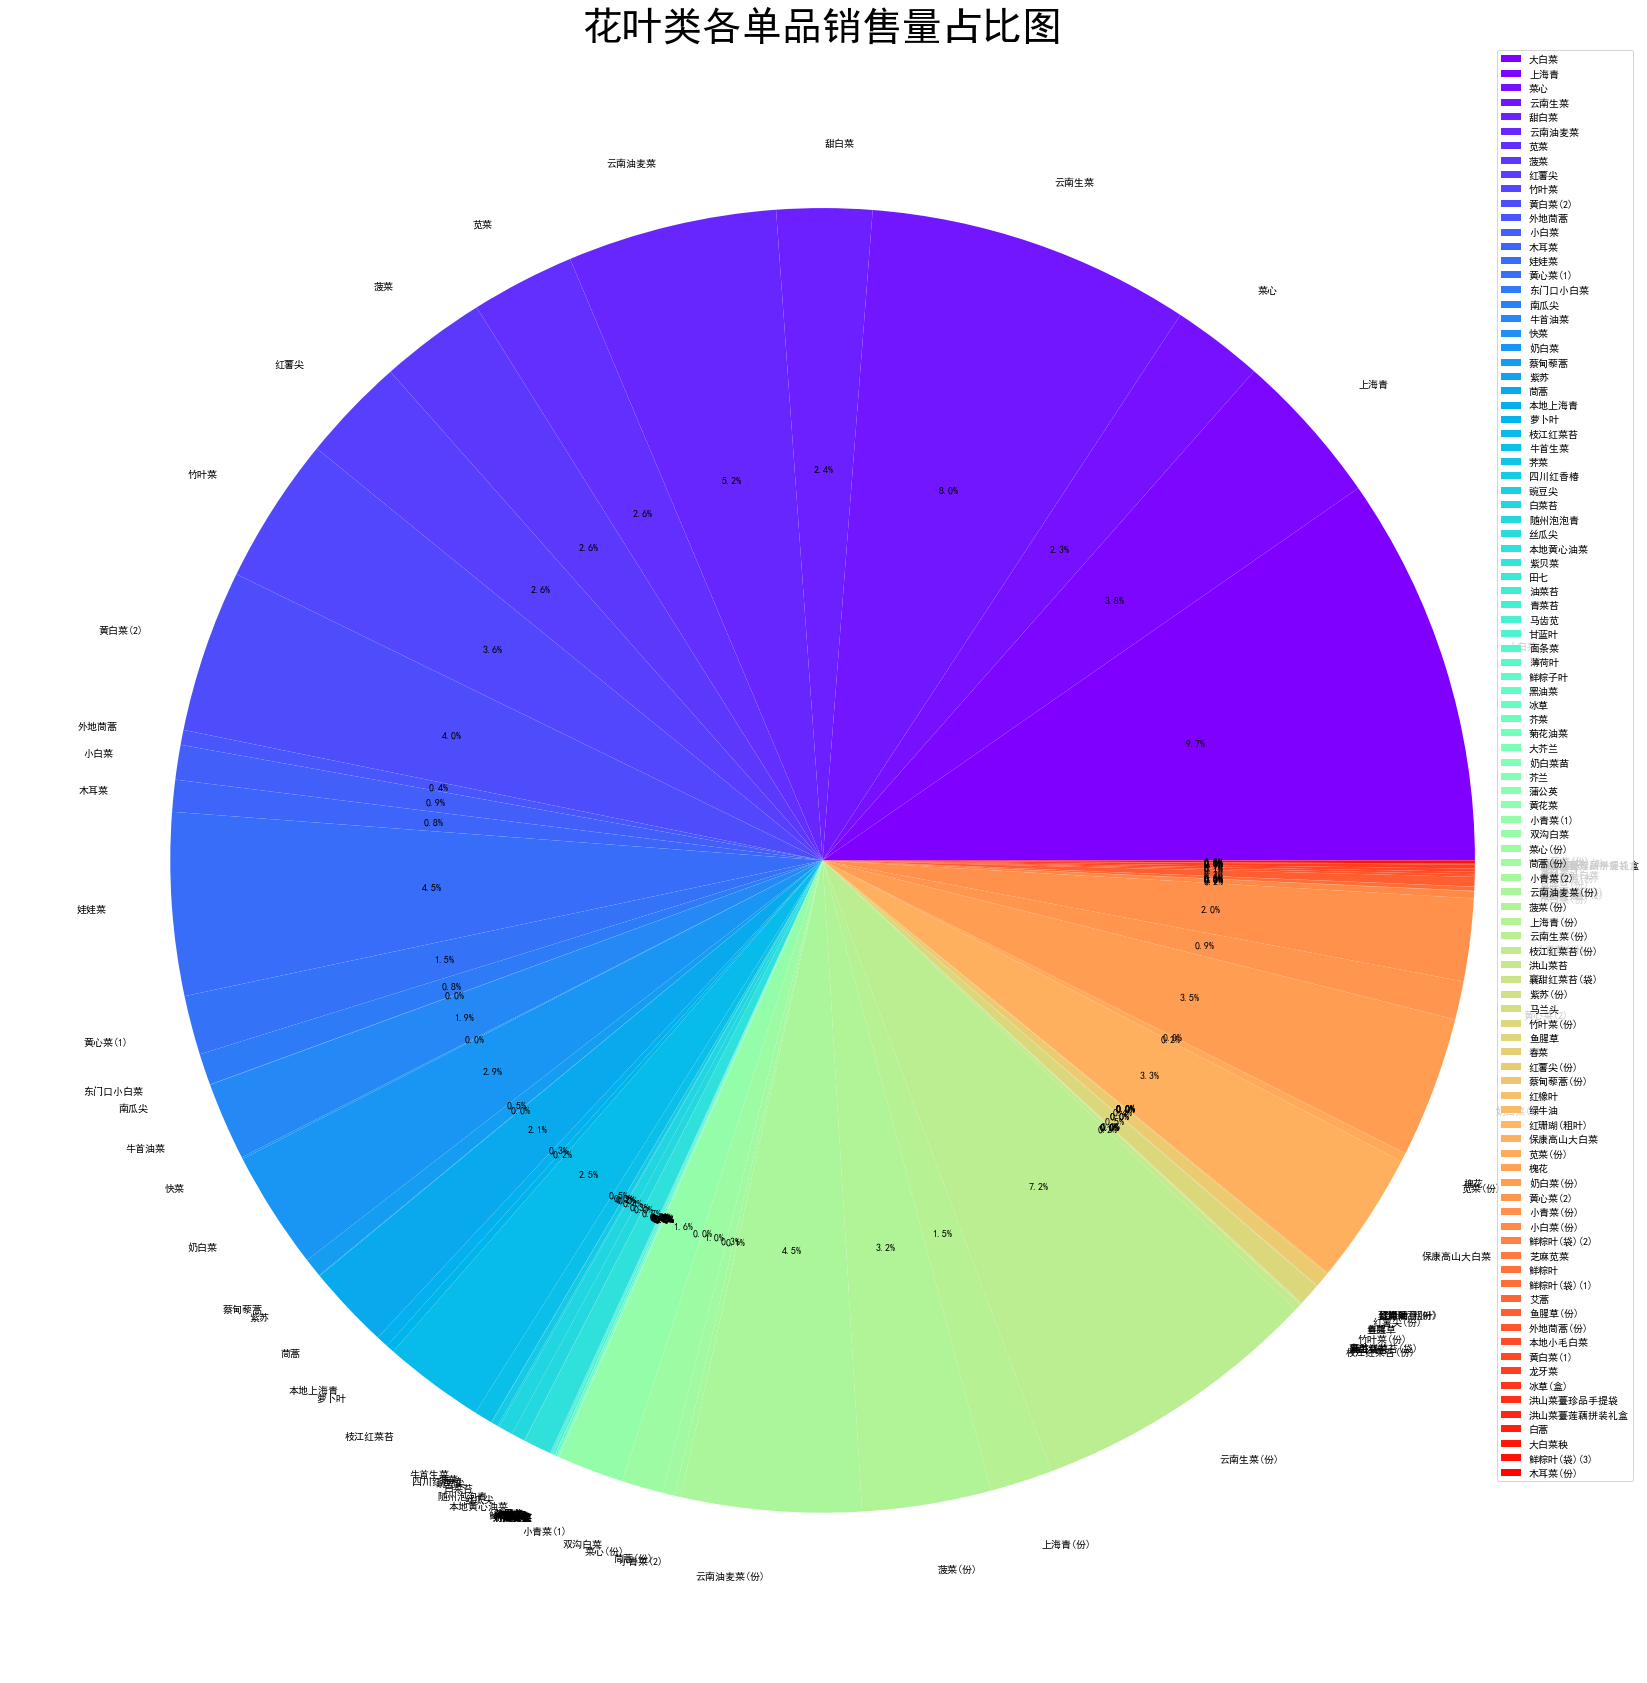

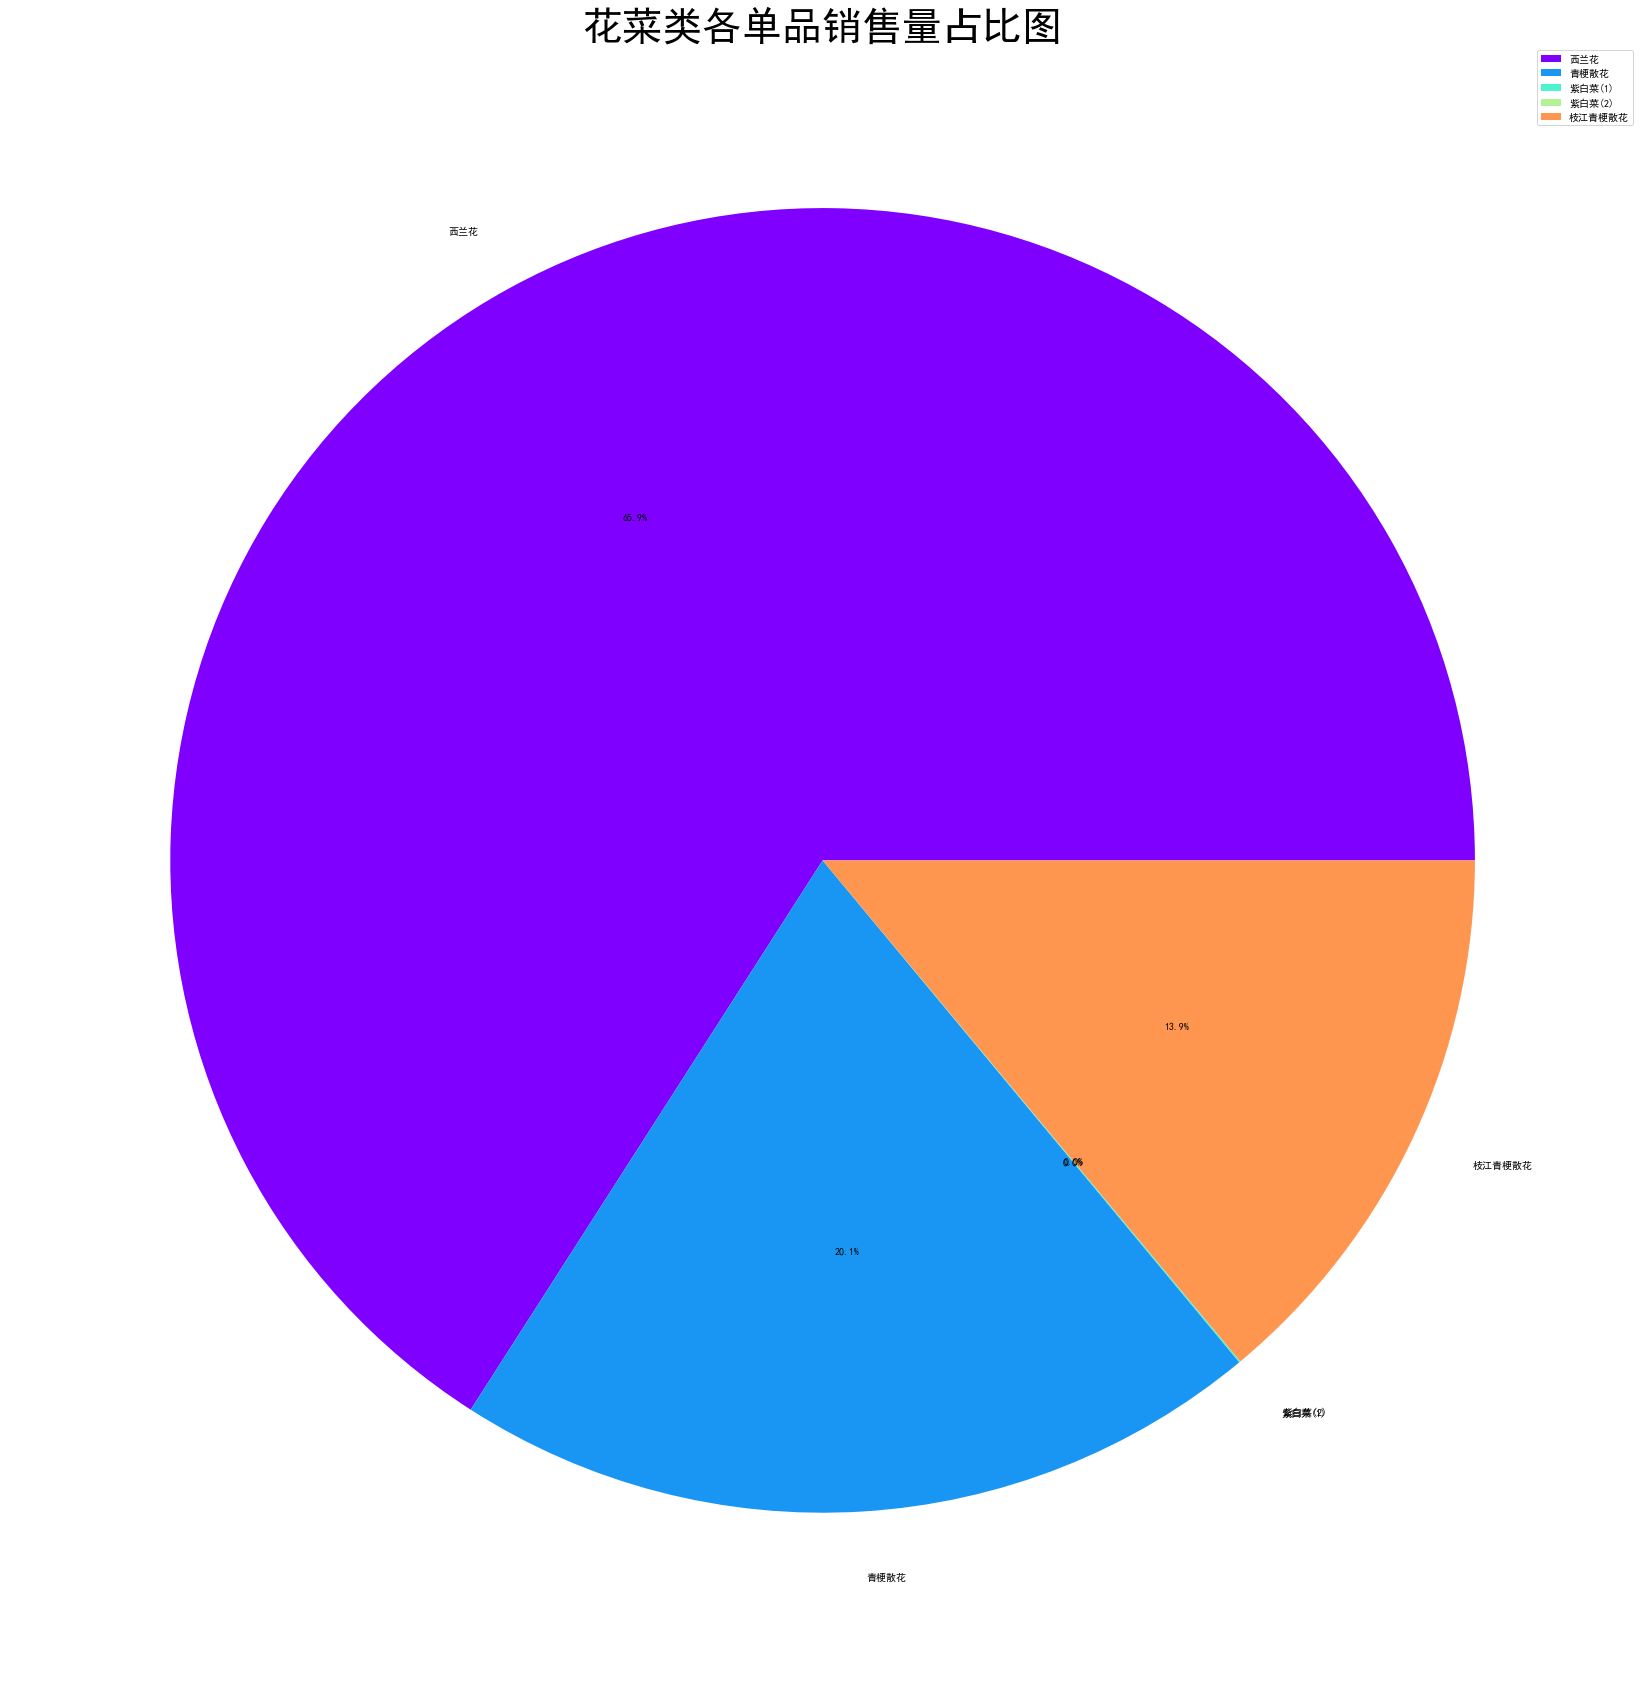

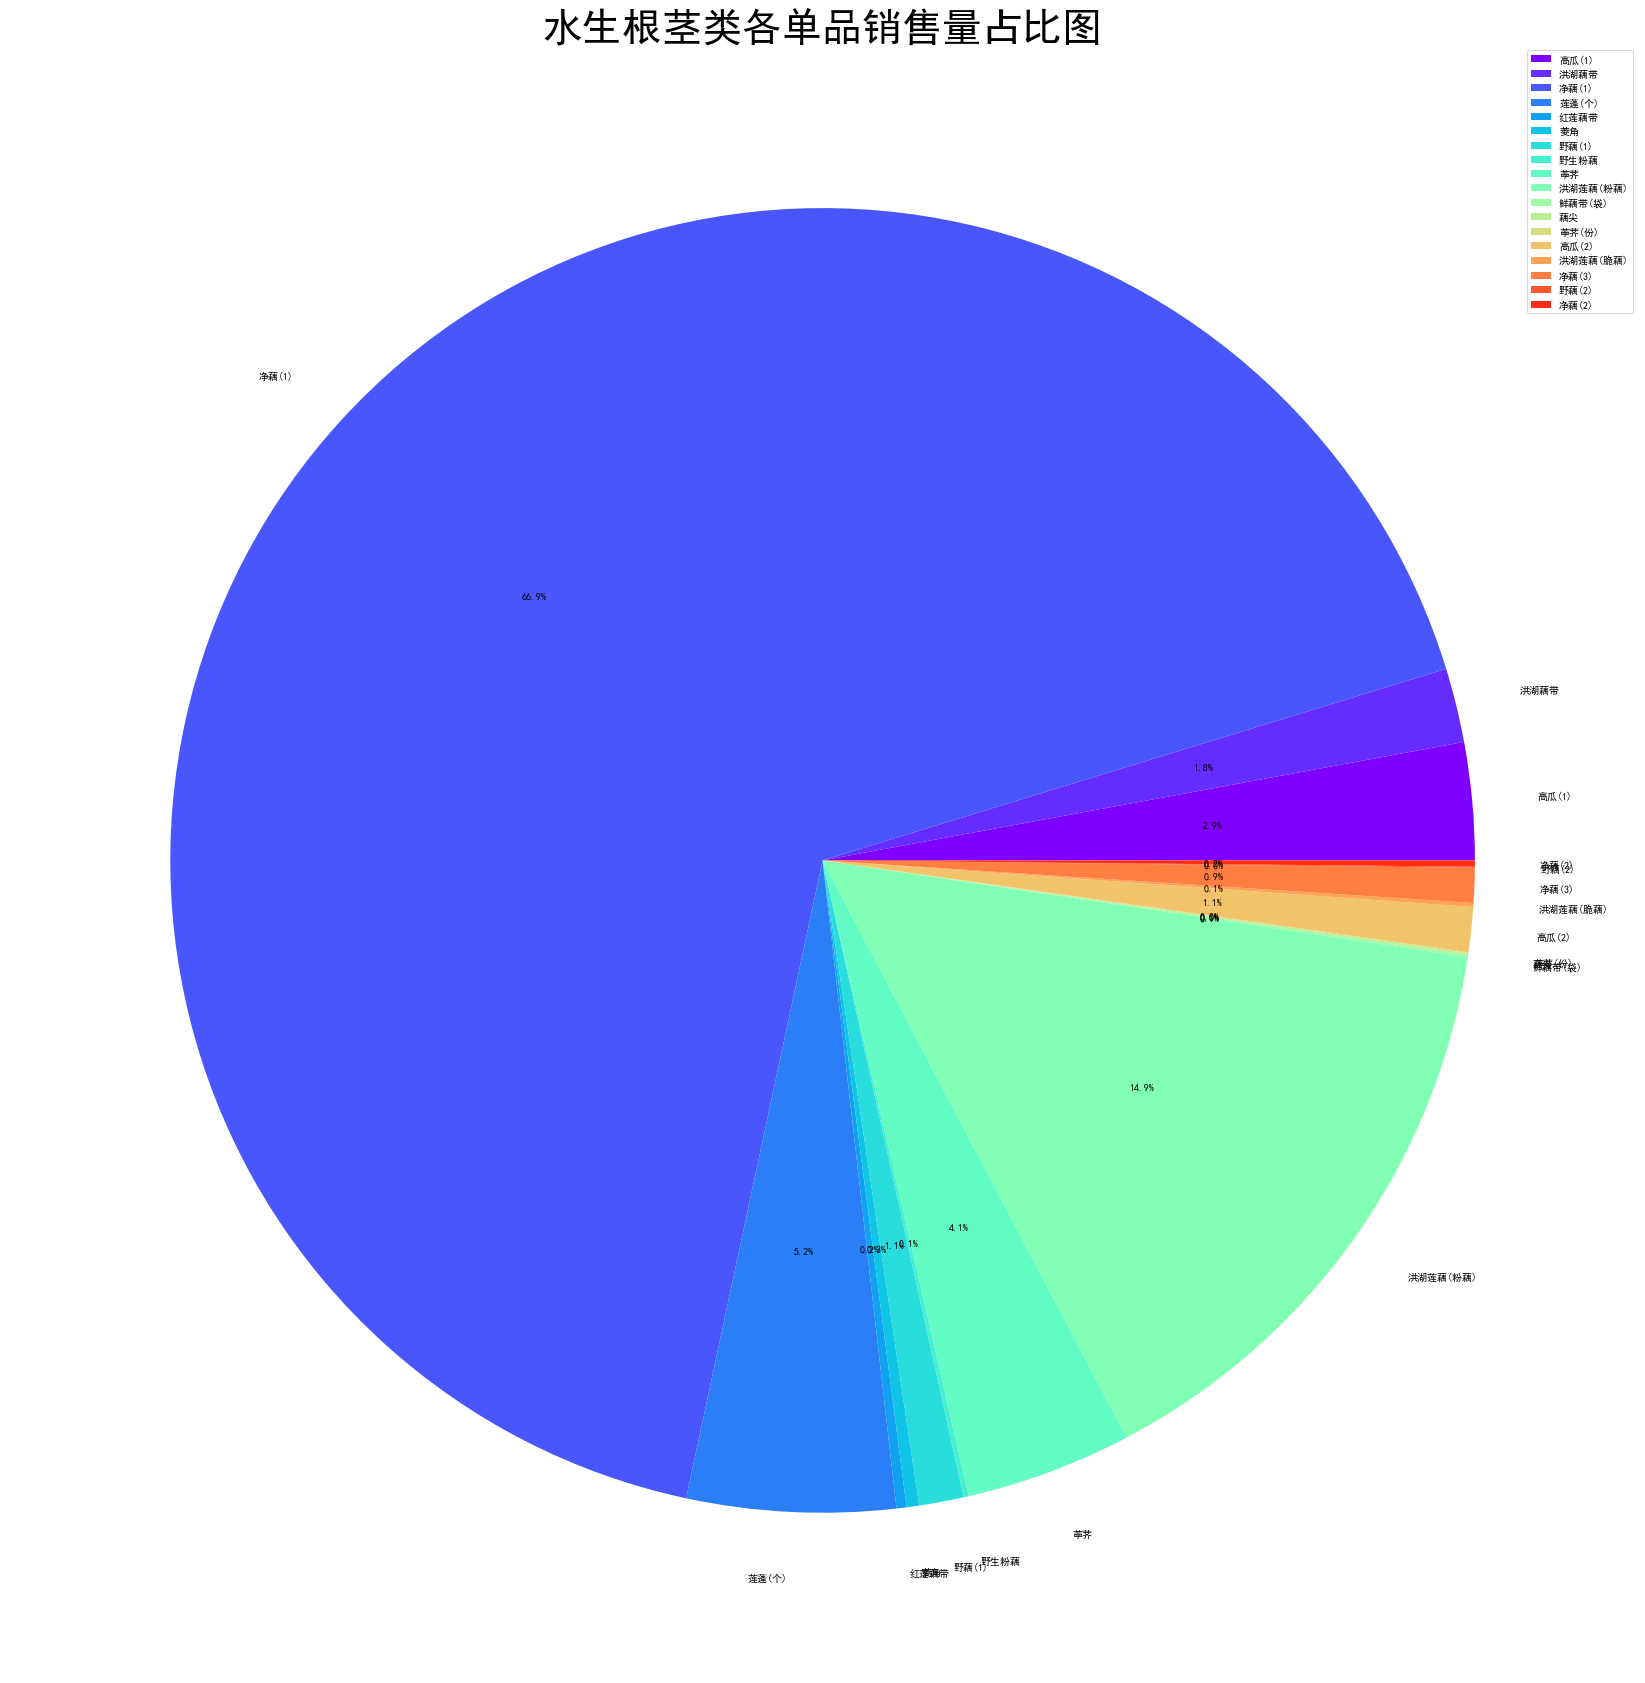

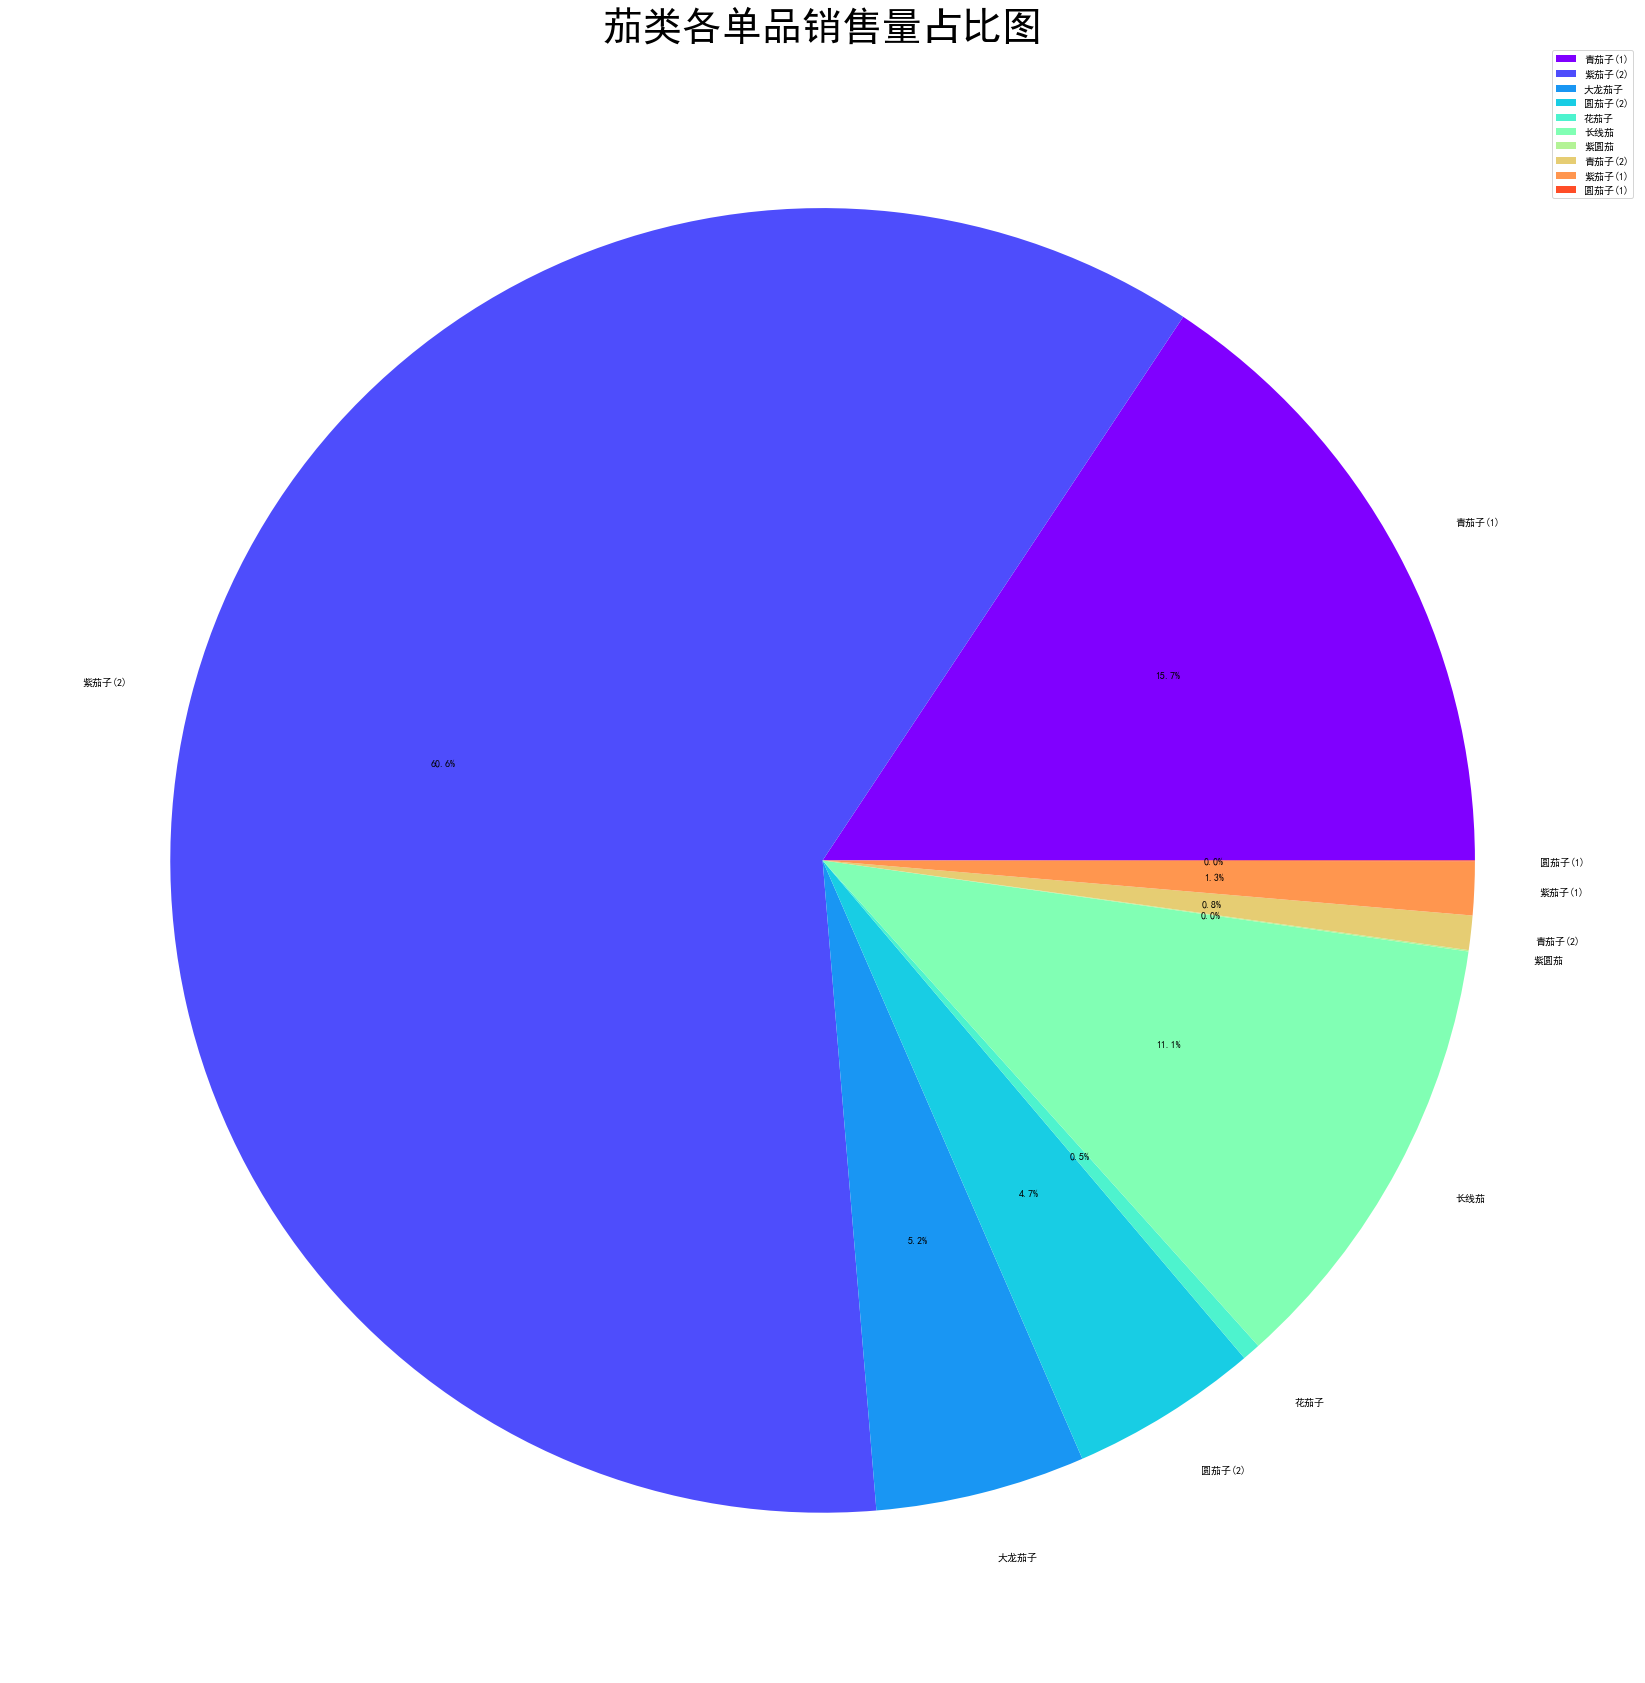

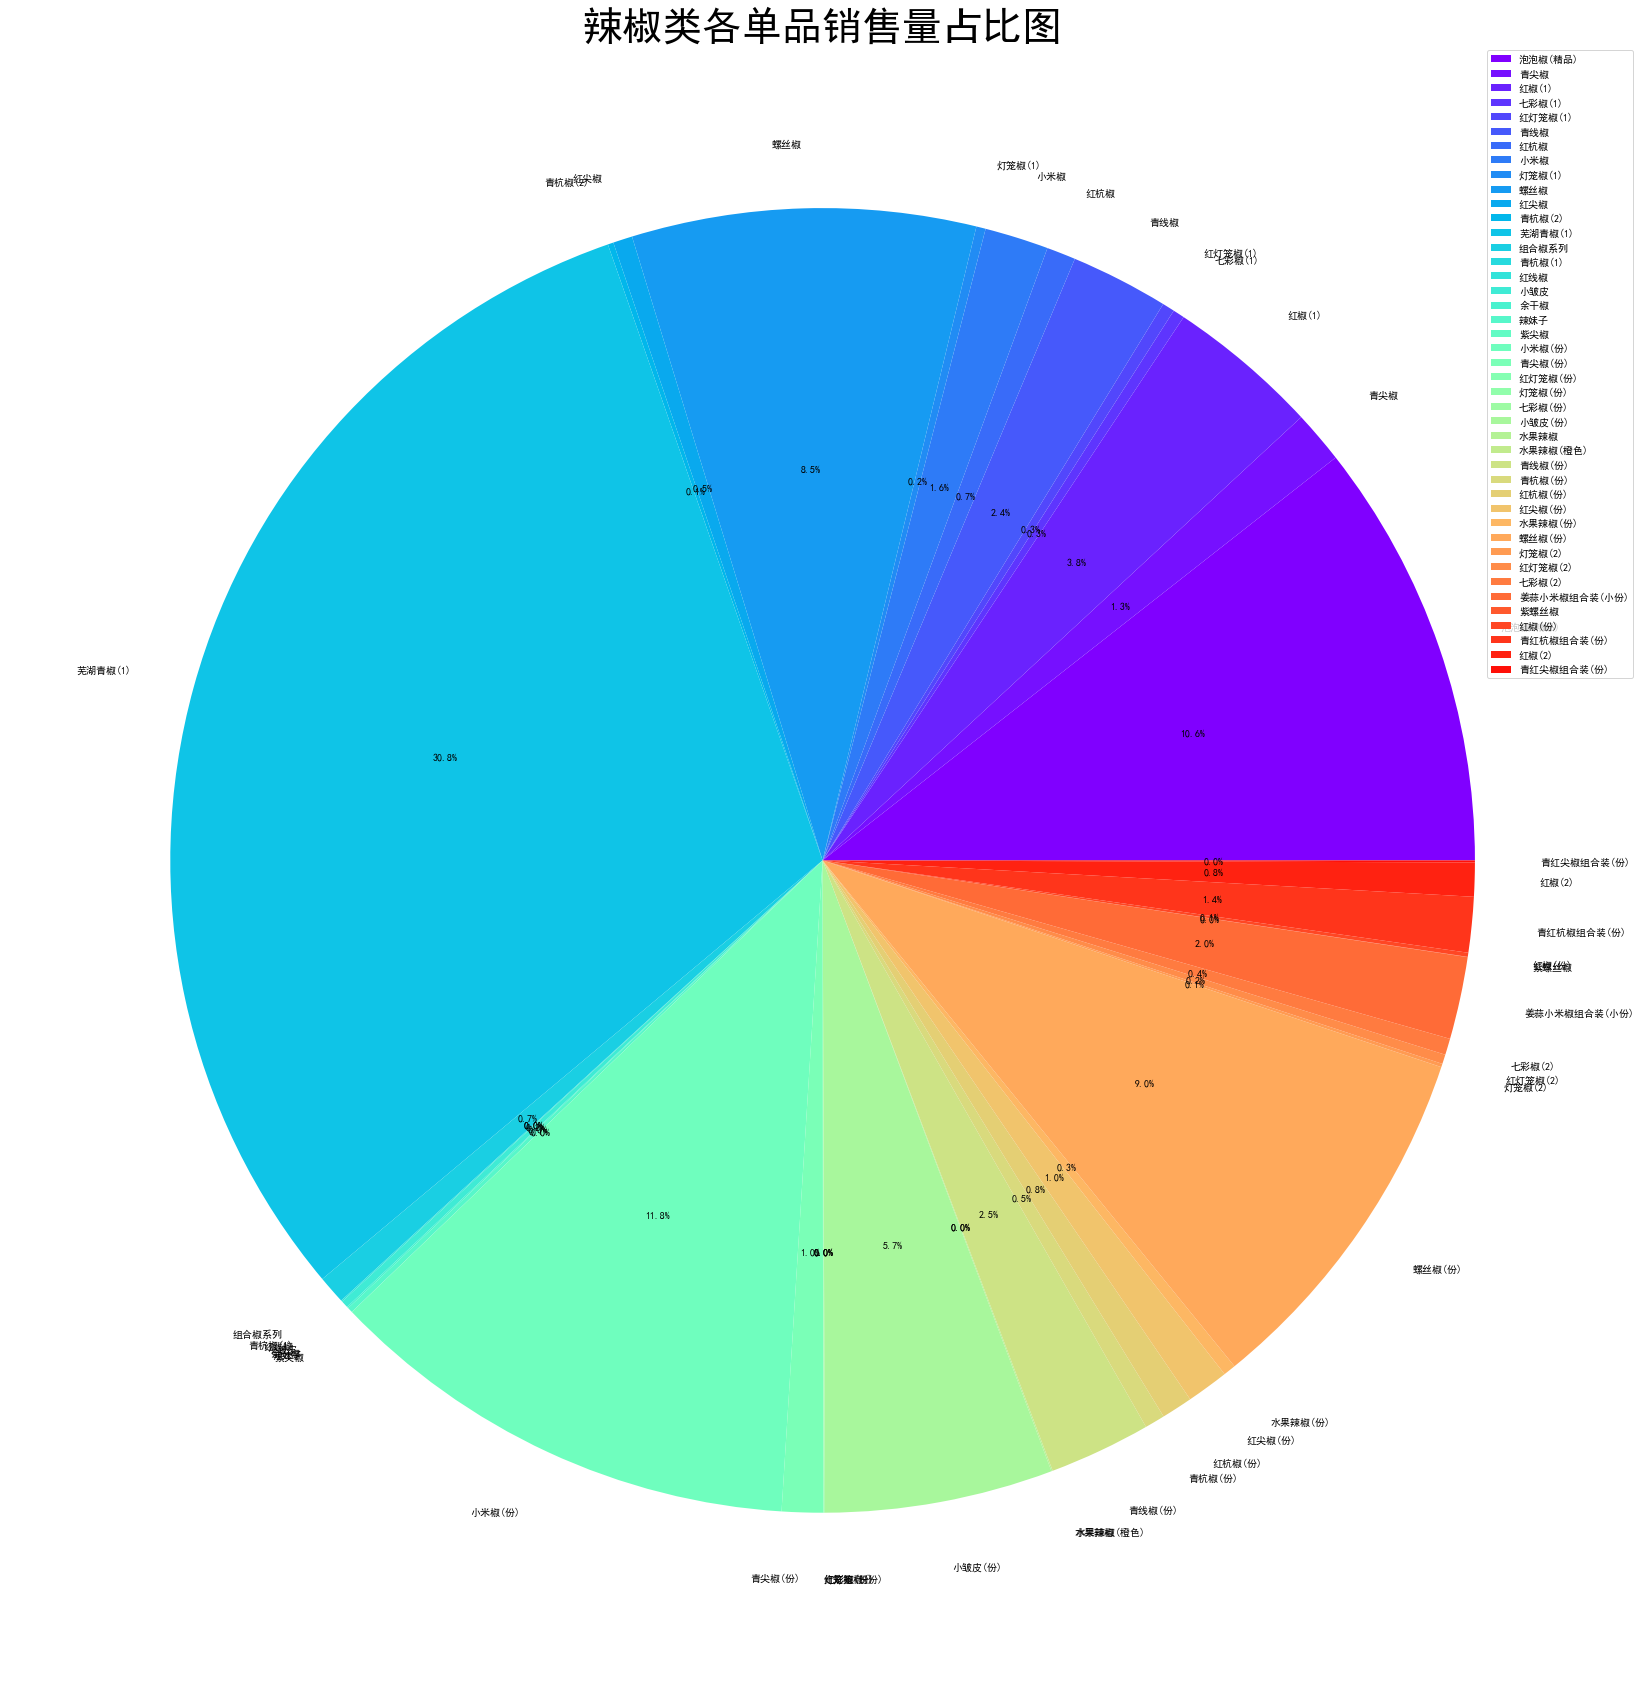

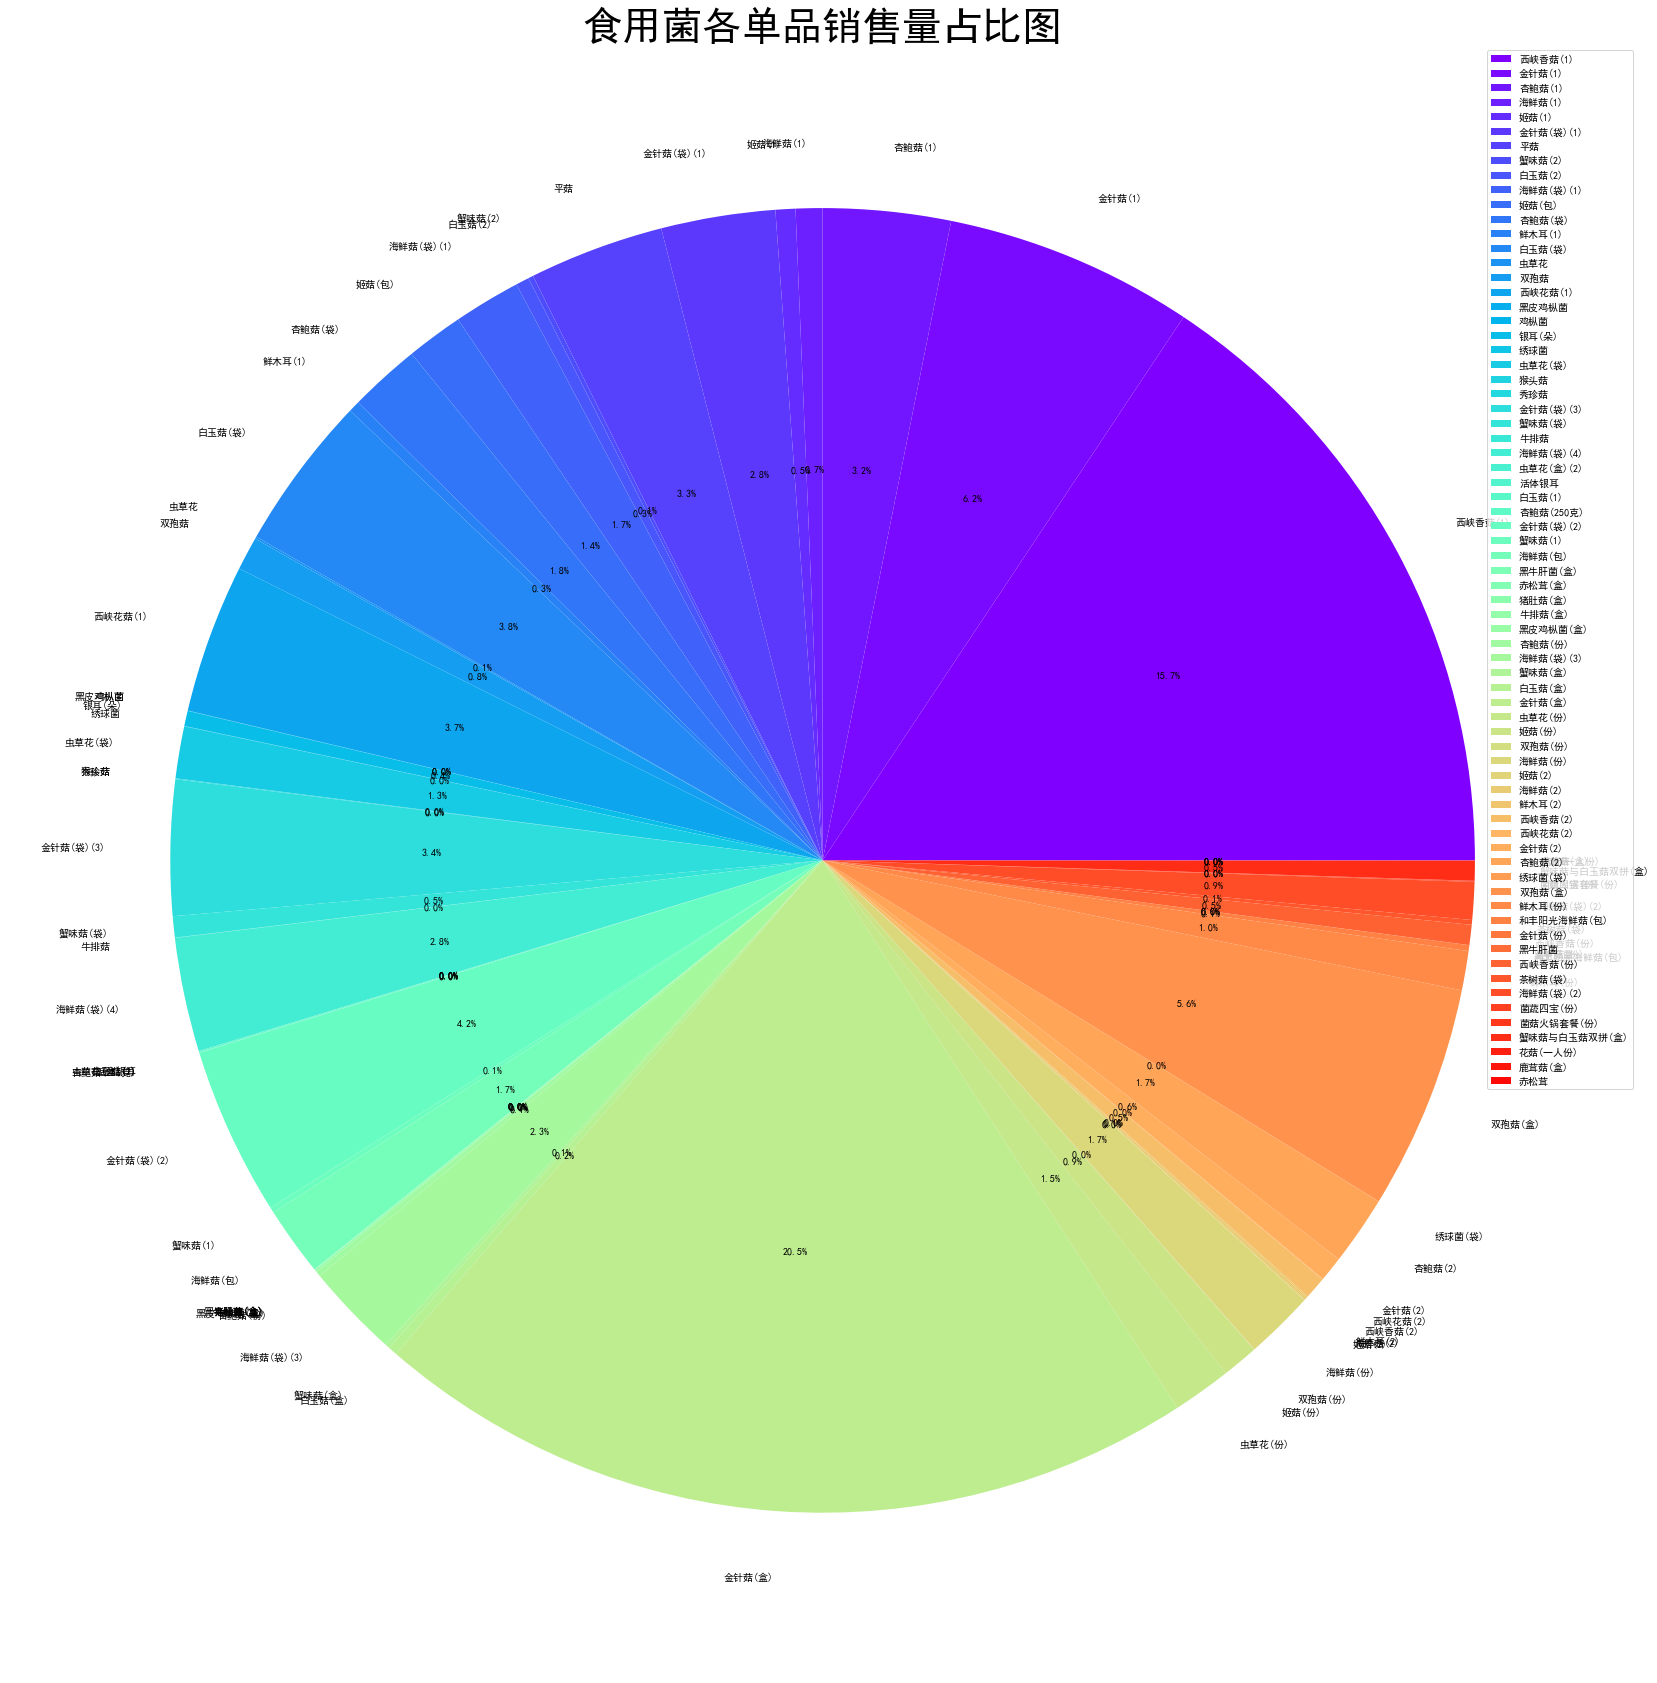

In [54]:
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    temp = pd.DataFrame([])
    for index in sum_per_column:
        plrow = pl.loc[index]
        if plrow['分类名称'] == types:
            name_CN = plrow['单品名称']
            temp[name_CN] = sum_per_column[index]

    import matplotlib.pyplot as plt
    from  matplotlib import cm
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    fig = plt.figure(figsize=(60,30))
    # 数据
    labels = temp.columns
    sizes = temp.values[0]
    colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False, startangle=170, colors=colors)
    # 绘制饼图
    plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%')
    plt.legend(fontsize = 10 , loc = 'best')
    # 设置图表标题
    plt.title(types+'各单品销售量占比图',fontsize = 40)
    plt.savefig('../data/piecharts/'+types+'PieChartNew.jpg')
    # 显示图表
    #plt.show()
    print(temp.T)
    temp.T.to_csv('../data/piecharts/'+types+'.csv', sep= ',', encoding='utf_8_sig')